<a href="https://colab.research.google.com/github/GeethaGolla14/GeethaGolla14/blob/main/Intelli_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Problem Statement 1:
# A retail store that has multiple outlets across the country are facing issues in managing the
# inventory - to match the demand with respect to supply. You are a data scientist, who has to
# come up with useful insights using the data and make prediction models to forecast the sales for
# X number of months/years.

In [21]:
data=pd.read_csv("/content/Walmart DataSet (1).csv")

In [22]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [23]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [24]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [26]:
data.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [27]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [28]:
data.shape

(6435, 8)

In [30]:

duplicates=data.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [31]:
duplicates_specific_columns = data.duplicated(subset=['Store', 'Date'])
duplicates_specific_columns

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [32]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [33]:
# Feature engineering: Extracting time features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data['Day'] = data['Date'].dt.dayofweek

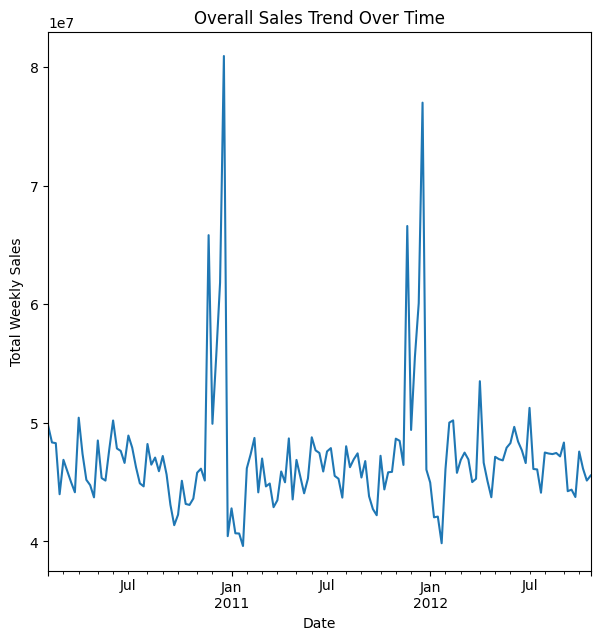

In [34]:
plt.figure(figsize=(7, 7))
data.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()

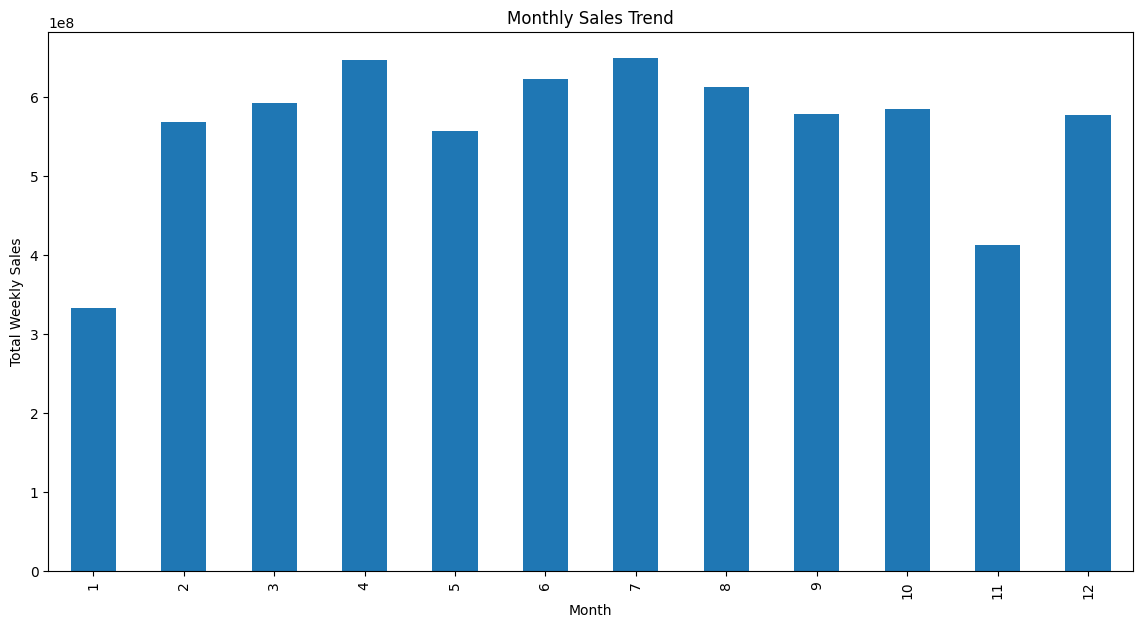

In [35]:
plt.figure(figsize=(14, 7))
data.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.show()

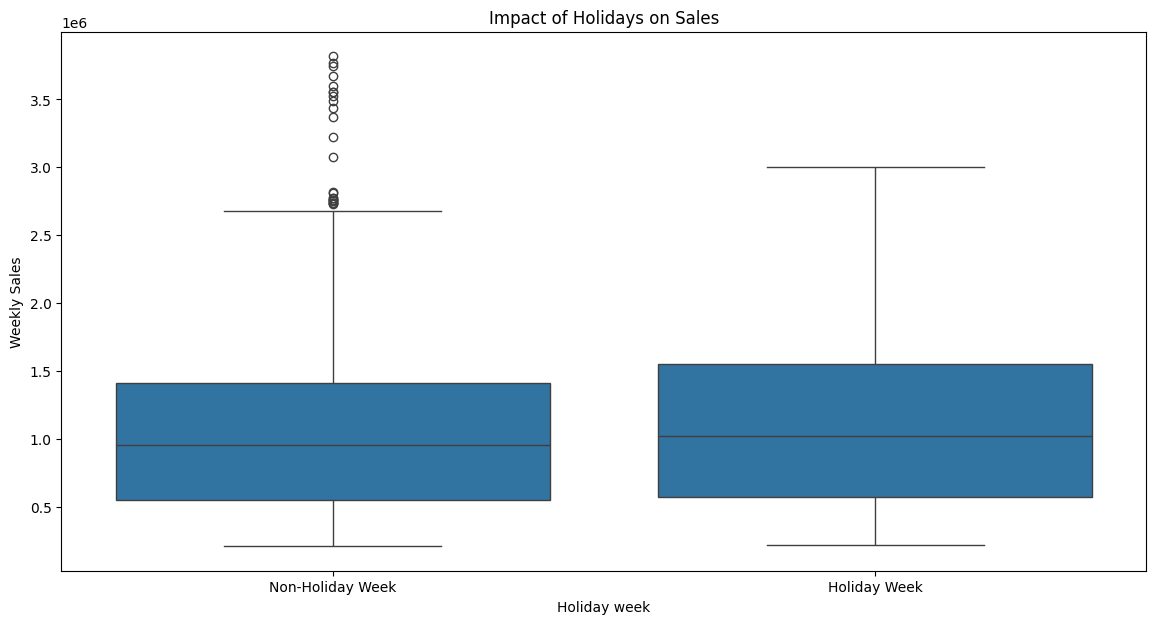

In [36]:
# Impact of Holidays on Sales
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Holiday_Flag', y='Weekly_Sales')
plt.title('Impact of Holidays on Sales')
plt.xlabel('Holiday week')
plt.ylabel('Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday Week', 'Holiday Week'])
plt.show()

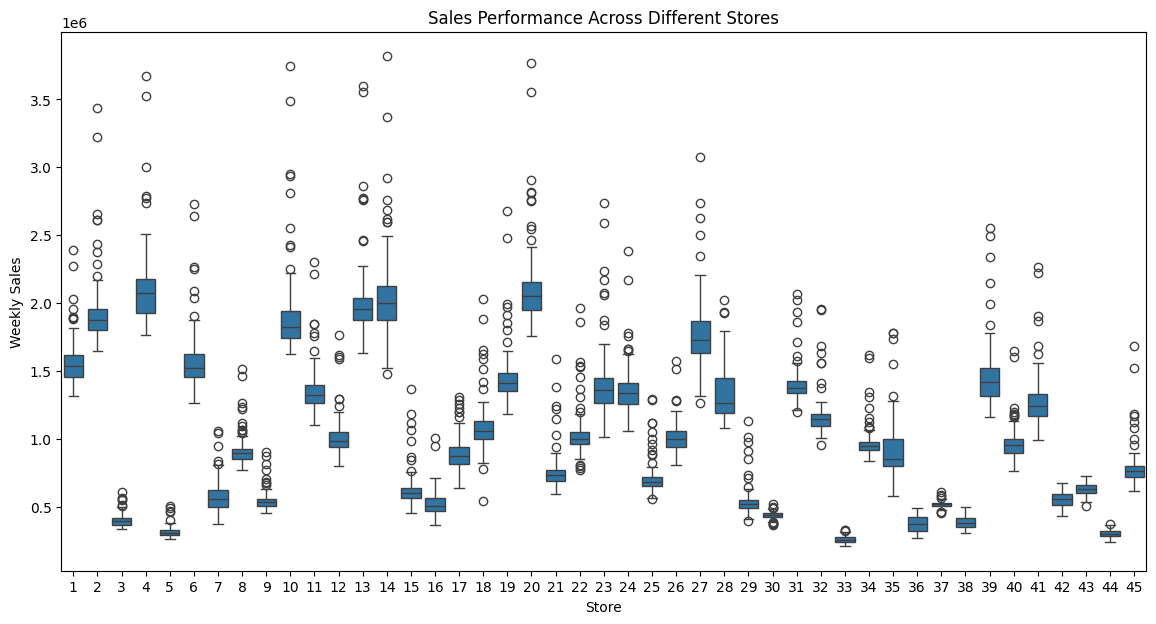

In [37]:
# Store Performance

# Sales Performance Across Different Stores
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Store', y='Weekly_Sales')
plt.title('Sales Performance Across Different Stores')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

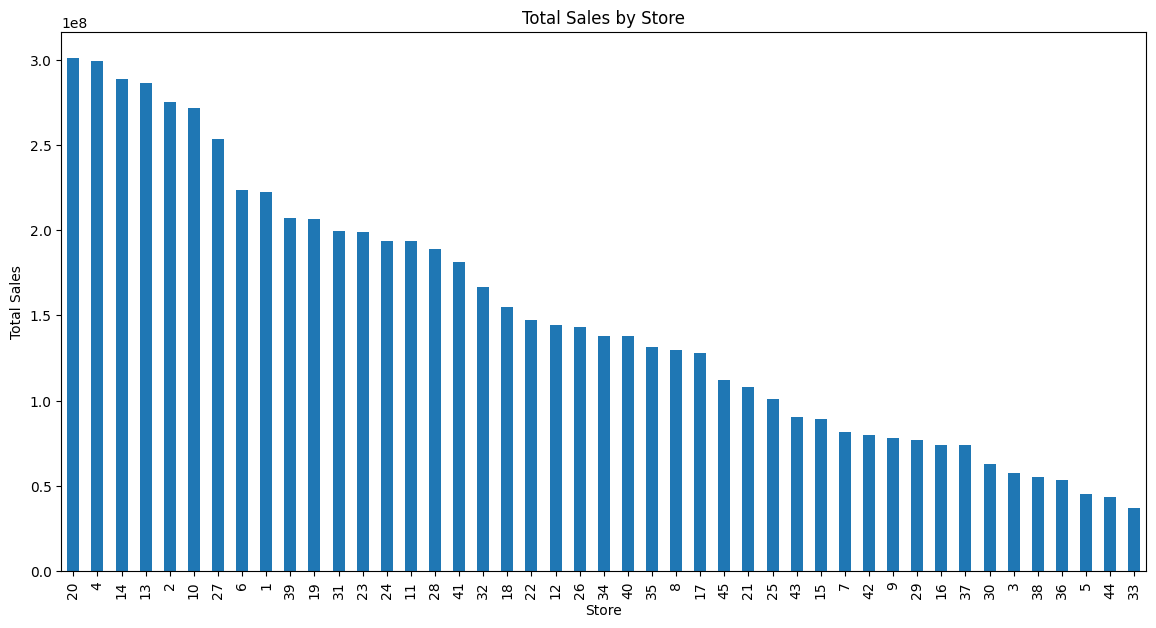

In [38]:
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
store_sales.plot(kind='bar')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

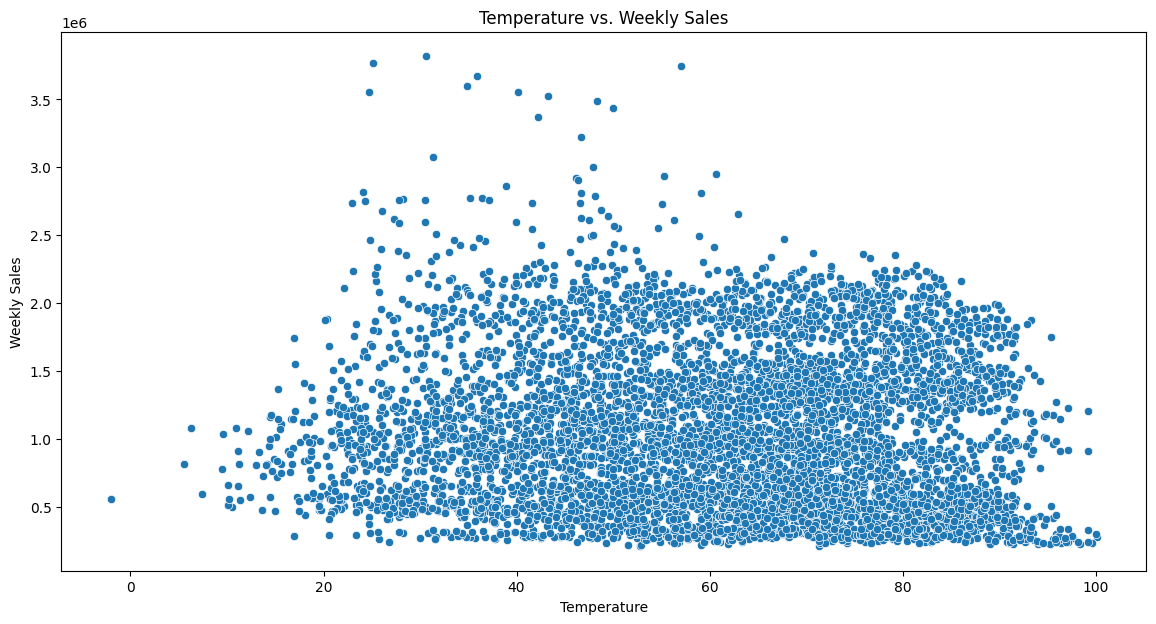

In [39]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

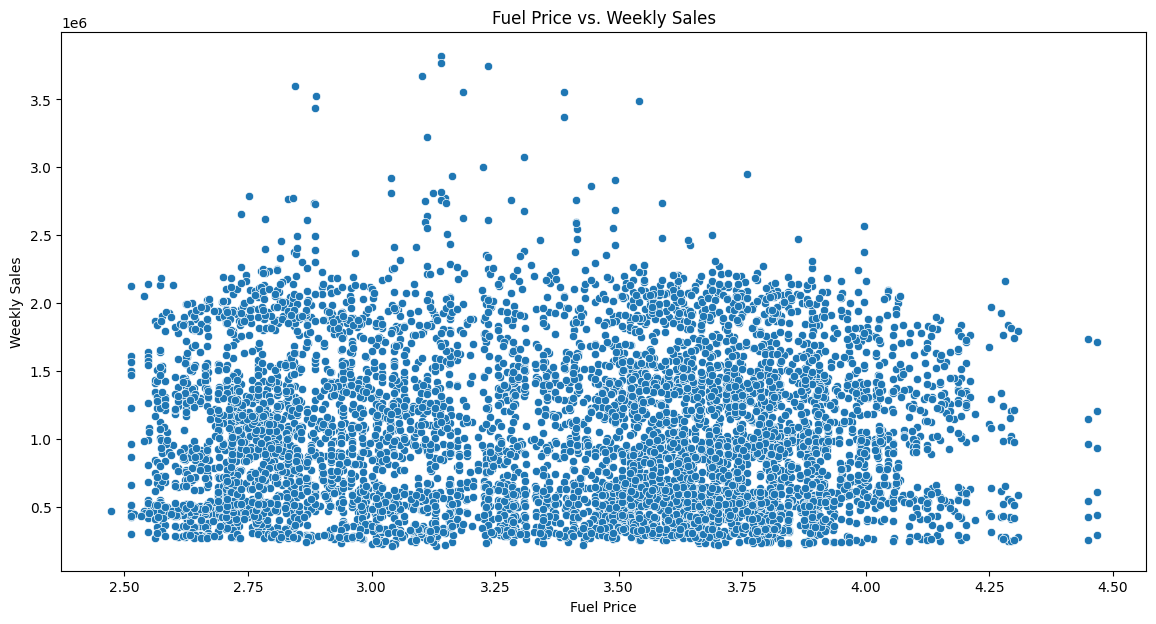

In [40]:
# Fuel Price vs. Weekly Sales
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Fuel_Price', y='Weekly_Sales')
plt.title('Fuel Price vs. Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


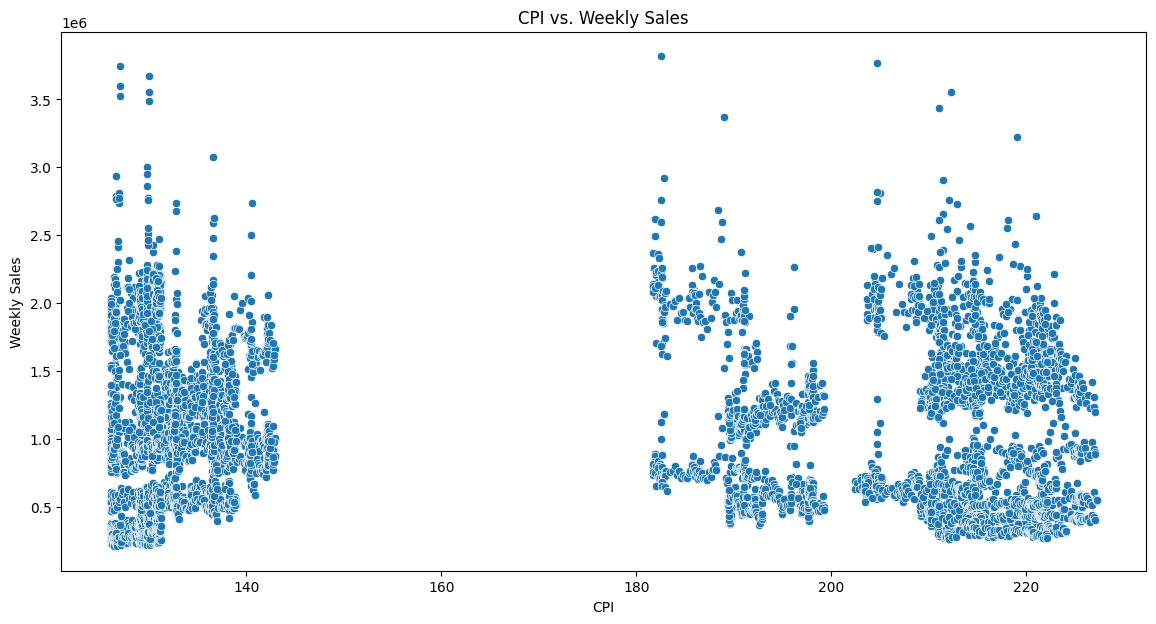

In [41]:
# CPI vs. Weekly Sales
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='CPI', y='Weekly_Sales')
plt.title('CPI vs. Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()


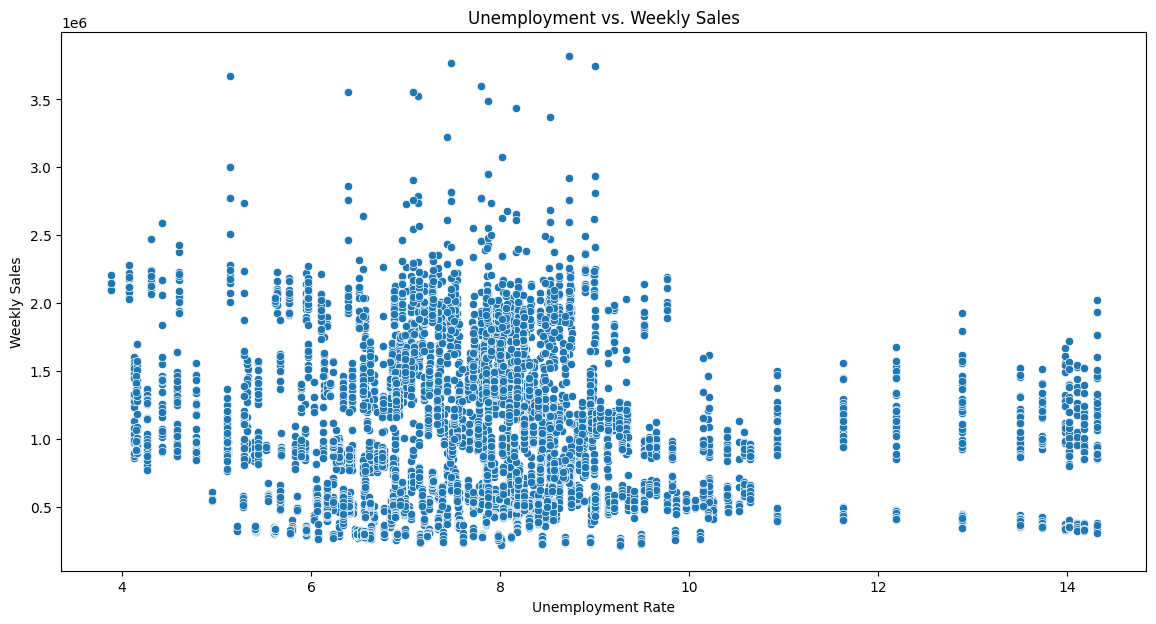

In [42]:
# Unemployment vs. Weekly Sales
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Unemployment', y='Weekly_Sales')
plt.title('Unemployment vs. Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

In [43]:
holiday_sales = data[data['Holiday_Flag'] == 1].groupby('Date')['Weekly_Sales'].sum()
non_holiday_sales = data[data['Holiday_Flag'] == 0].groupby('Date')['Weekly_Sales'].sum()

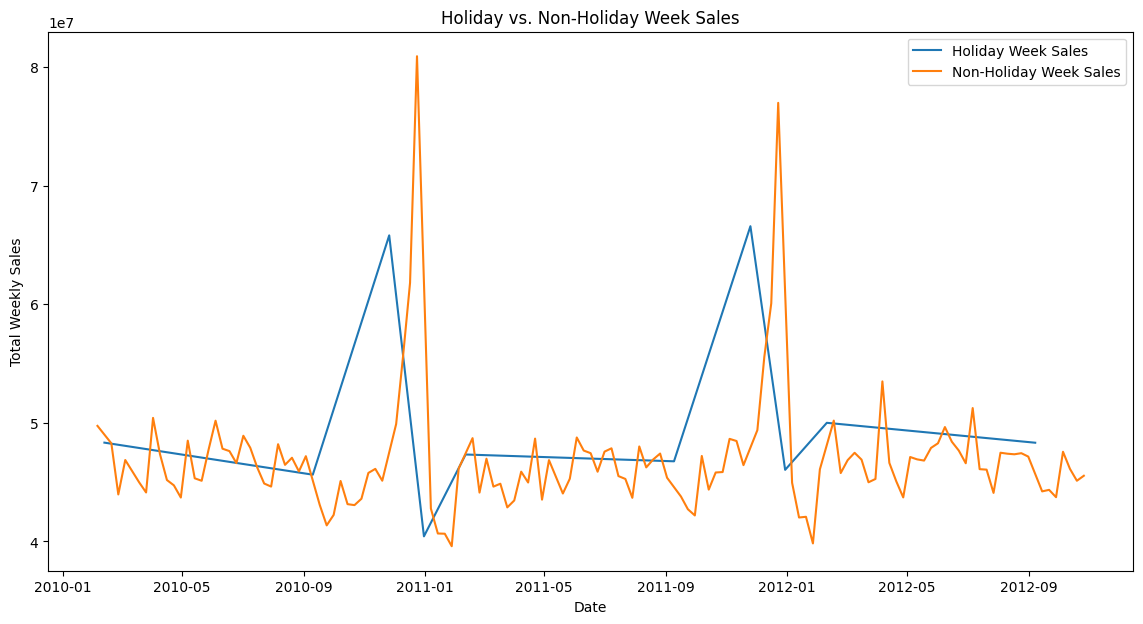

In [44]:
plt.figure(figsize=(14, 7))
plt.plot(holiday_sales.index, holiday_sales.values, label='Holiday Week Sales')
plt.plot(non_holiday_sales.index, non_holiday_sales.values, label='Non-Holiday Week Sales')
plt.title('Holiday vs. Non-Holiday Week Sales')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.show()

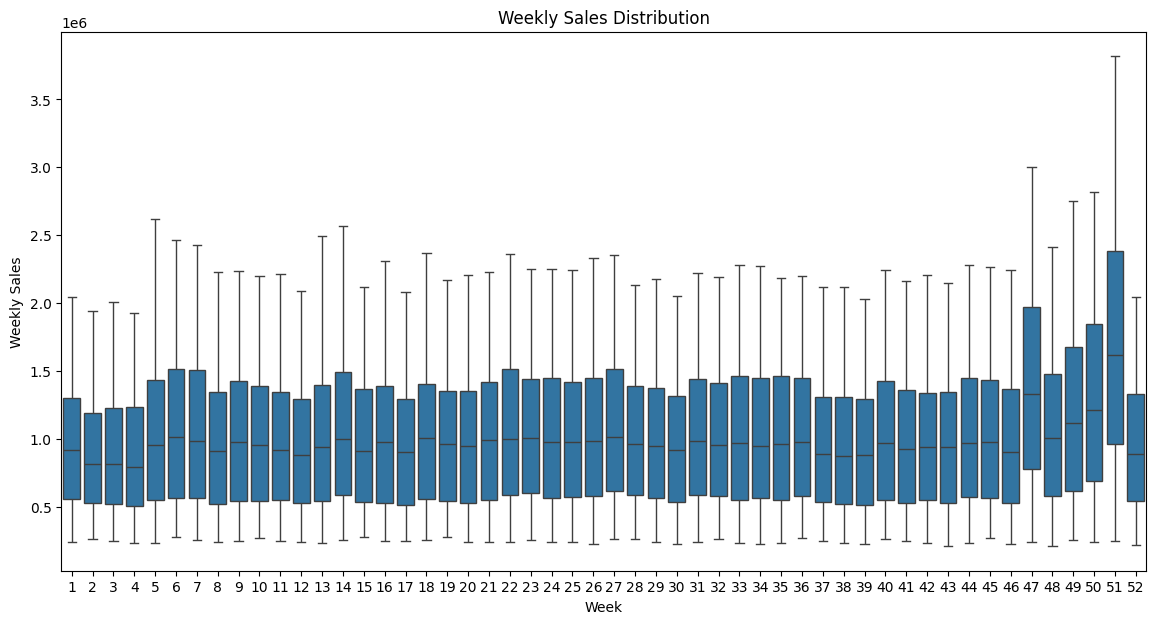

In [45]:
# Identify Weeks with Unusually High or Low Sales
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Week', y='Weekly_Sales')
plt.title('Weekly Sales Distribution')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.show()

In [46]:
# Highlight Anomalies
threshold_high = data['Weekly_Sales'].quantile(0.99)
threshold_low = data['Weekly_Sales'].quantile(0.01)

high_sales_weeks = data[data['Weekly_Sales'] > threshold_high]
low_sales_weeks = data[data['Weekly_Sales'] < threshold_low]

print("Weeks with unusually high sales:")
print(high_sales_weeks)

print("\nWeeks with unusually low sales:")
print(low_sales_weeks)

Weeks with unusually high sales:
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
185       2 2010-11-26    2658725.29             1        62.98       2.735   
188       2 2010-12-17    2609166.75             0        47.55       2.869   
189       2 2010-12-24    3436007.68             0        49.97       2.886   
237       2 2011-11-25    2614202.30             1        56.36       3.236   
240       2 2011-12-16    2432736.52             0        50.13       3.159   
...     ...        ...           ...           ...          ...         ...   
3764     27 2010-12-24    3078162.08             0        31.34       3.309   
3812     27 2011-11-25    2504400.71             1        47.88       3.689   
3816     27 2011-12-23    2739019.75             0        41.59       3.587   
5480     39 2010-12-24    2495489.25             0        58.86       2.886   
5532     39 2011-12-23    2554482.84             0        54.62       3.112   

             CPI  

In [47]:
# One-hot encode the categorical features (e.g., Month, Day)
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[['Month', 'Day']])
encoded_feature_names = encoder.get_feature_names_out(['Month', 'Day'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
# Concatenate encoded features with the original dataframe
data = pd.concat([data, encoded_df], axis=1)

In [49]:


# Prepare the data for linear regression
X = data.drop(columns=['Store', 'Date', 'Weekly_Sales', 'Month', 'Day'])
y = data['Weekly_Sales']

In [50]:
# Train-test split
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [51]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the next 12 weeks
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(weeks=1), periods=12, freq='W')
future_df = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Week': future_dates.isocalendar().week,
    'Day': future_dates.dayofweek
})

In [53]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'train_df' is your training DataFrame with 'Month' and 'Day' columns
# Fitting the encoder on the training data
encoder = OneHotEncoder()
encoder.fit(train_df[['Month', 'Day']])

# Transforming the future data
# Ensure 'future_df' has 'Month' and 'Day' columns and valid data
if 'Month' in future_df.columns and 'Day' in future_df.columns:
    encoded_future_features = encoder.transform(future_df[['Month', 'Day']])
else:
    print("Error: 'Month' and/or 'Day' columns are missing in 'future_df'")


NameError: name 'train_df' is not defined

In [52]:
encoded_future_features = encoder.transform(future_df[['Month', 'Day']])
encoded_future_df = pd.DataFrame(encoded_future_features, columns=encoded_feature_names)
future_df = pd.concat([future_df, encoded_future_df], axis=1)
X_future = future_df.drop(columns=['Month', 'Day'])

future_predictions = model.predict(X_future)

# Display the forecast
print(future_predictions)

# Plotting the forecast
plt.figure(figsize=(15, 8))
plt.plot(future_dates, future_predictions, label='Linear Regression Forecast')
plt.title('12 Weeks Sales Forecast using Linear Regression')
plt.xlabel('Week')
plt.ylabel('Forecasted Sales')
plt.legend()
plt.show()


ValueError: Found unknown categories [6] in column 1 during transform

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('walmart.csv')

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])
duplicates_specific_columns = data.duplicated(subset=['Store', 'Date'])
duplicates_specific_columns

# Feature engineering: Extracting time features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data['Day'] = data['Date'].dt.dayofweek

# One-hot encode the categorical features (e.g., Month, Day)
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[['Month', 'Day']])
encoded_feature_names = encoder.get_feature_names_out(['Month', 'Day'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate encoded features with the original dataframe
data = pd.concat([data, encoded_df], axis=1)

# Prepare the data for linear regression
X = data.drop(columns=['Store', 'Date', 'Weekly_Sales', 'Month', 'Day'])
y = data['Weekly_Sales']

# Train-test split
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the next 12 weeks
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(weeks=1), periods=12, freq='W')
future_df = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Week': future_dates.isocalendar().week,
    'Day': future_dates.dayofweek
})
encoded_future_features = encoder.transform(future_df[['Month', 'Day']])
encoded_future_df = pd.DataFrame(encoded_future_features, columns=encoded_feature_names)
future_df = pd.concat([future_df, encoded_future_df], axis=1)
X_future = future_df.drop(columns=['Month', 'Day'])

future_predictions = model.predict(X_future)

# Display the forecast
print(future_predictions)

# Plotting the forecast
plt.figure(figsize=(15, 8))
plt.plot(future_dates, future_predictions, label='Linear Regression Forecast')
plt.title('12 Weeks Sales Forecast using Linear Regression')
plt.xlabel('Week')
plt.ylabel('Forecasted Sales')
plt.legend()
plt.show()


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("/content/Walmart DataSet (1).csv")

# Convert Date to datetime with correct format
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

# Extract additional time-related features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

# Define features and target variable
X = data[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Week']]
y = data['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales for the next 12 weeks
future_dates = pd.date_range(start=data['Date'].max(), periods=12, freq='W')
future_df = pd.DataFrame({
    'Store': np.random.choice(data['Store'].unique(), 12),  # Randomly select stores for demonstration
    'Holiday_Flag': np.random.choice([0, 1], 12),  # Randomly select holiday flags for demonstration
    'Temperature': np.random.uniform(data['Temperature'].min(), data['Temperature'].max(), 12),  # Random temperature values
    'Fuel_Price': np.random.uniform(data['Fuel_Price'].min(), data['Fuel_Price'].max(), 12),  # Random fuel price values
    'CPI': np.random.uniform(data['CPI'].min(), data['CPI'].max(), 12),  # Random CPI values
    'Unemployment': np.random.uniform(data['Unemployment'].min(), data['Unemployment'].max(), 12),  # Random unemployment rate values
    'Month': future_dates.month,
    'Week': future_dates.isocalendar().week
})

# Ensure columns are in the correct order
future_df = future_df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Week']]

future_df['Predicted_Weekly_Sales'] = model.predict(future_df)

print("Forecasted Sales for the Next 12 Weeks:")
print(future_df[['Store', 'Predicted_Weekly_Sales']])


Forecasted Sales for the Next 12 Weeks:
            Store  Predicted_Weekly_Sales
2012-10-28     33            8.615607e+05
2012-11-04     36            9.702005e+05
2012-11-11      8            1.318272e+06
2012-11-18     35            8.415495e+05
2012-11-25     25            9.974692e+05
2012-12-02     33            1.021760e+06
2012-12-09     42            9.270387e+05
2012-12-16     10            1.387272e+06
2012-12-23     15            1.323815e+06
2012-12-30     28            9.794437e+05
2013-01-06     26            8.567728e+05
2013-01-13     39            7.578991e+05


In [56]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9
